In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
merged_df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')
merged_df.head()   #loading dataset 1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#checking if there are any missing values in the given dataset.
missing_values = merged_df.isna()
missing_values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
# Converting MonthlyCharges to float
columns_to_convert = ['MonthlyCharges']
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(float)
merged_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Converting TotalCharges to float after replacing empty strings with np.nan
columns_to_convert = ['TotalCharges']
merged_df[columns_to_convert] = merged_df[columns_to_convert].replace(' ', np.nan).astype(float)
merged_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

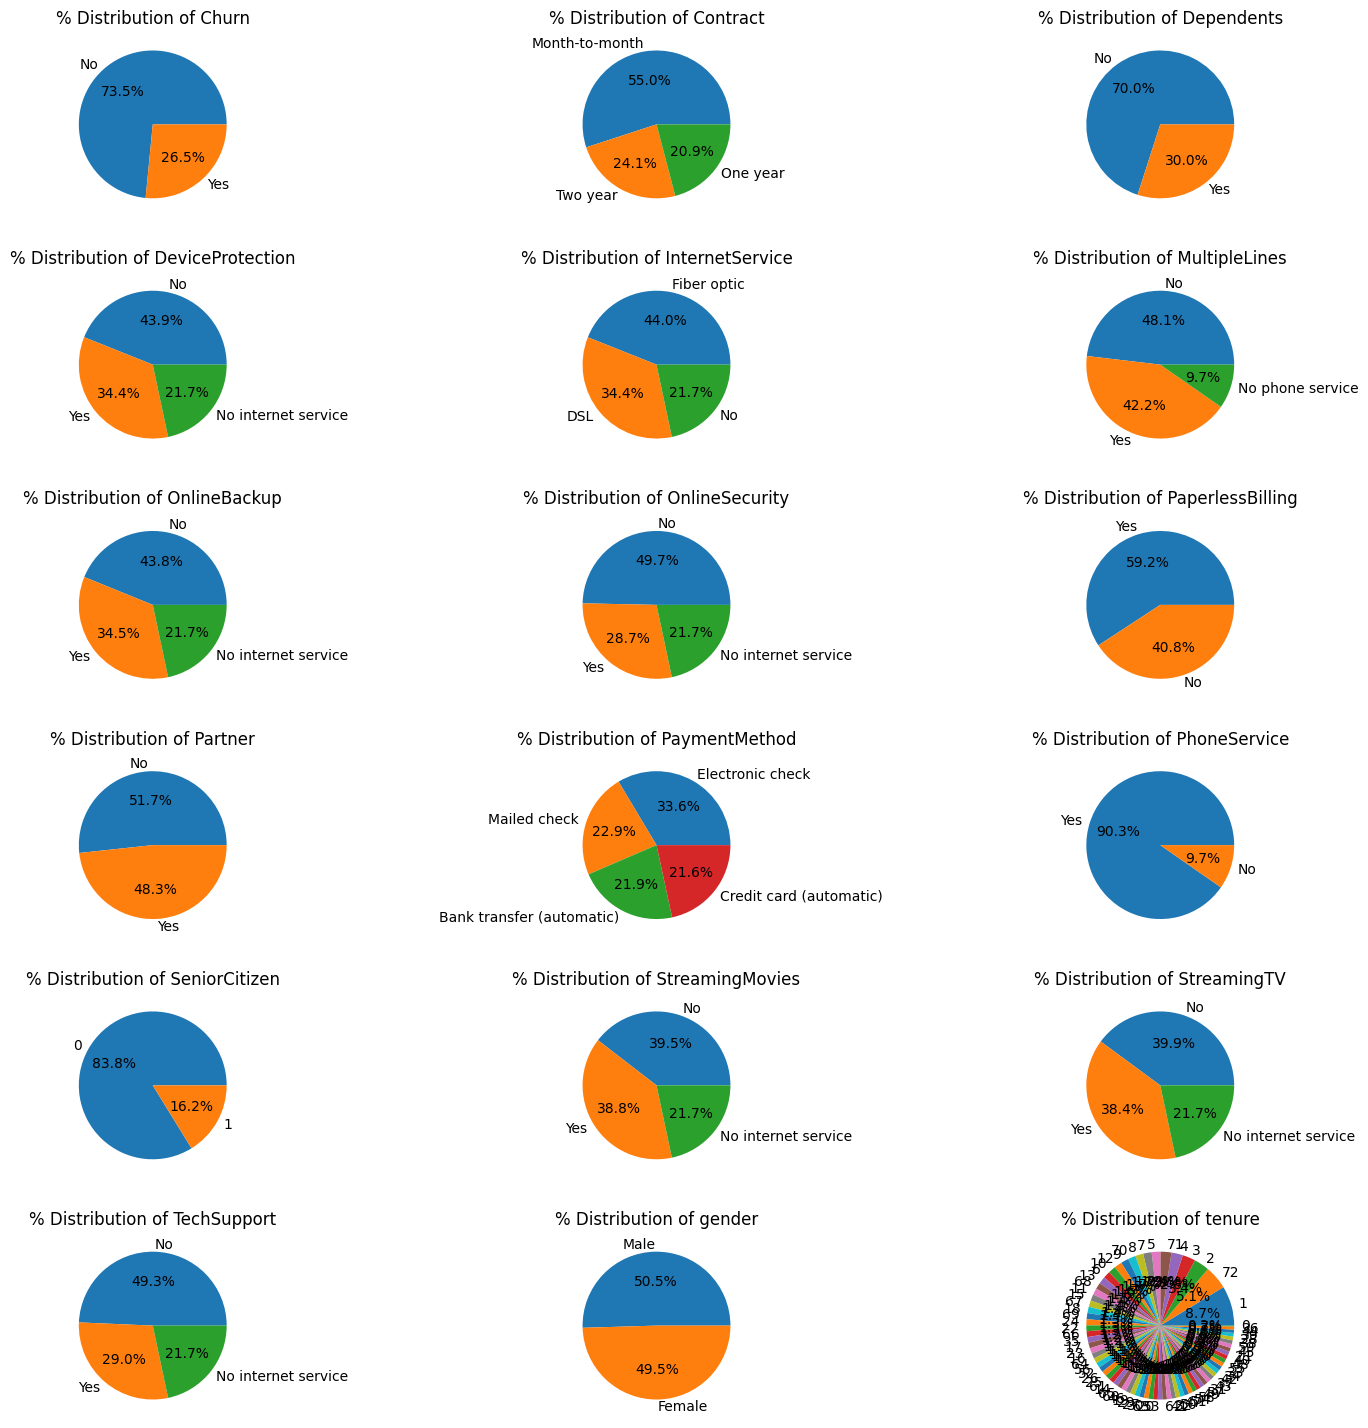

In [8]:
fig, axes = plt.subplots(6,3,figsize=(18,18)) # required rows,cols and plotsize
fig.subplots_adjust(hspace=0.3, wspace=0.3) # required height_space and width_space

#  Function that will accept a DataFrame and axes as input and return pie-charts for the appropriate categorical features
#  Function returns pie charts with % Distribution of the categorical features
def fun(merged_df,axes):
    categorical_cols = merged_df.select_dtypes(include=['object', 'int64']).columns
    categorical_cols = categorical_cols.difference(['customerID'])

    i=j=0
    for column in categorical_cols:
        if j > 2:
            j = 0
            i += 1
            
        values = merged_df[column].value_counts()
        axes[i, j].pie(values, labels=values.index, autopct='%1.1f%%')
        axes[i, j].set_title('% Distribution of {}'.format(column))

        j+=1

fun(merged_df,axes)